In [ ]:
#Name :- Somesh Bachani
#Task :- Develop a neural network that can read handwriting.

In [1]:
#importing required files
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 15s 1us/step


In [3]:
#Size of dataset
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


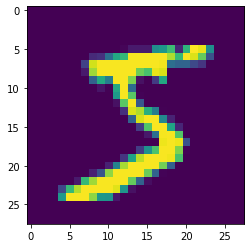

In [6]:
plt.imshow(X_train[0])

In [5]:
y_train[0]

5

In [7]:
#Resizing the data to fit the model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [8]:
#One-hot Encoding: 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Printing the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#Build the CNN model
model = Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [10]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
#Train the model
hist = model.fit(X_train,y_train_one_hot,validation_data=(X_test,y_test_one_hot), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 100s 2ms/step - loss: 0.3056 - accuracy: 0.9507 - val_loss: 0.1101 - val_accuracy: 0.9707
Epoch 2/3
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0831 - val_accuracy: 0.9756
Epoch 3/3
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.1101 - val_accuracy: 0.9708


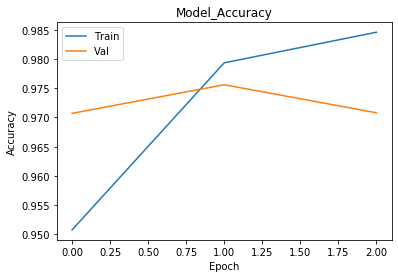

In [12]:
#Visualise the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [13]:
#Show predictions as probabilities for the first 5 images in the test set
predictions = model.predict(X_test[:5])
predictions

array([[4.32644458e-12, 4.84047031e-21, 1.56649449e-09, 1.28267885e-08,
        1.58685747e-19, 5.23670793e-15, 5.93973649e-17, 1.00000000e+00,
        4.56725546e-09, 1.63463887e-09],
       [3.20660369e-08, 3.45953058e-11, 1.00000000e+00, 3.06582926e-10,
        1.16126401e-12, 2.30336925e-16, 2.74845657e-08, 1.19991777e-11,
        1.52635016e-09, 1.77624318e-16],
       [7.93564325e-09, 9.99984503e-01, 8.13658971e-06, 8.64386063e-10,
        1.32901135e-07, 2.69799244e-07, 2.96785561e-06, 1.11262473e-07,
        3.96560108e-06, 2.26950103e-09],
       [9.99007642e-01, 1.17325816e-16, 5.43454325e-06, 8.01149858e-12,
        1.62277580e-10, 1.72968431e-10, 9.76131298e-04, 2.42663650e-11,
        4.51849900e-07, 1.02483009e-05],
       [5.25034505e-09, 2.00388193e-17, 1.43392311e-08, 4.47839925e-11,
        9.99466002e-01, 1.73775433e-14, 3.11442955e-10, 5.53182283e-12,
        6.71583189e-09, 5.34020539e-04]], dtype=float32)

In [14]:
#Print the predictions as number label for the first five images
print(np.argmax(predictions,axis=1))
#print the actual result
print(y_test[:5])

[7 2 1 0 4]
[7 2 1 0 4]


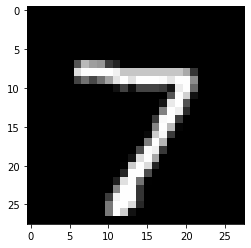

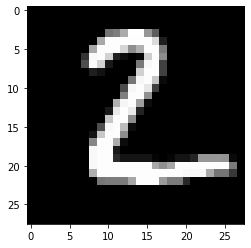

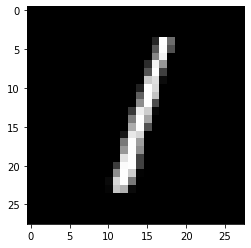

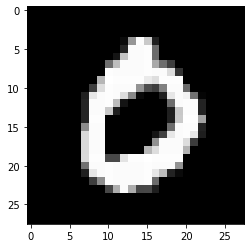

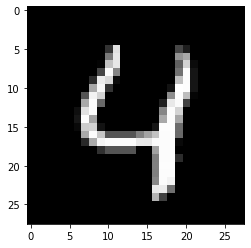

In [15]:
#Show the first five images
for i in range(0,5):
  image = X_test[i]
  image = np.array(image,dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()

In [ ]:
#We find our model to be working perfectly